problem statement
The objective of this project is to analyze and predict house prices based on area.

First, data analysis will be performed to understand the relationship between area and price by using basic statistics and visualizations. This helps identify patterns and trends in the data.

Next, a machine learning regression model will be built to predict the price of a house using its area. The model will be trained on historical data and evaluated to measure prediction accuracy.

This project helps in understanding how house area affects price and demonstrates the use of data analysis and machine learning for real-world price prediction.

In [91]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Arcite\Downloads\house-prices.csv")
df

,area,price
0,1567,177067.50
1,3345,511748.20
2,3722,404096.67
3,2783,357916.31
4,2949,362409.54
...,...,...
995,3442,434336.51
996,1530,211400.14
997,2102,172513.03
998,1551,200701.84


In [3]:
df.isna().sum()

area     0
price    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    1000 non-null   int64  
 1   price   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [6]:
df.describe()

,area,price
count,1000.000000,1000.000000
mean,2972.920000,348132.020970
std,1128.465907,142136.964031
min,1002.000000,-19630.310000
25%,2063.500000,249198.307500
50%,2918.500000,348351.020000
75%,3917.750000,449603.300000
max,5000.000000,734120.220000


In [7]:
df.corr()

,area,price
area,1.000000,0.766919
price,0.766919,1.000000


Text(0, 0.5, 'price')

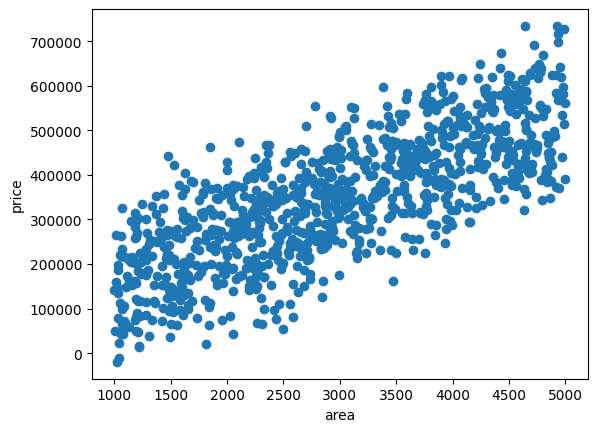

In [8]:
plt.scatter(df["area"],df["price"])
plt.xlabel("area")
plt.ylabel("price")

Text(0, 0.5, 'price')

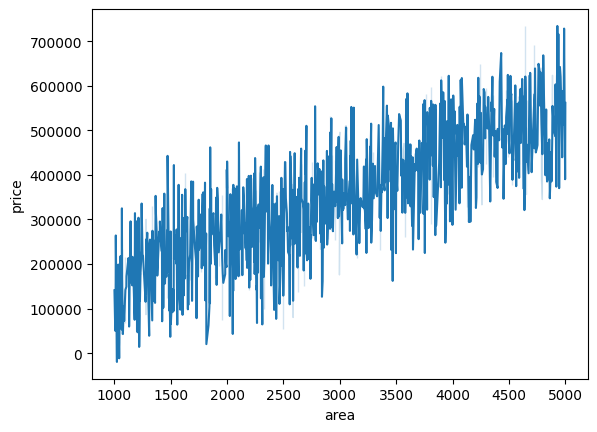

In [9]:
sns.lineplot(x="area",y="price",data=df)
plt.xlabel("area")
plt.ylabel("price")

Text(0.5, 0, 'area')

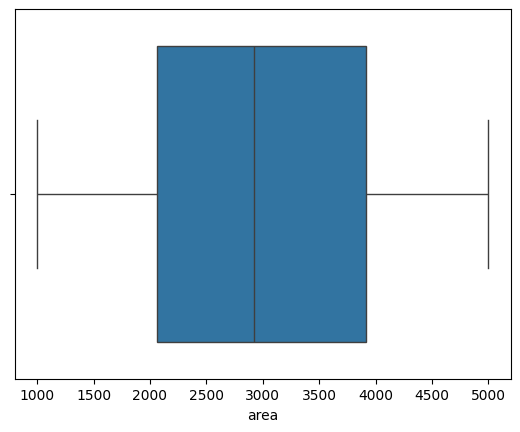

In [10]:
sns.boxplot(x="area",data=df)
plt.xlabel("area")


Text(0, 0.5, 'price')

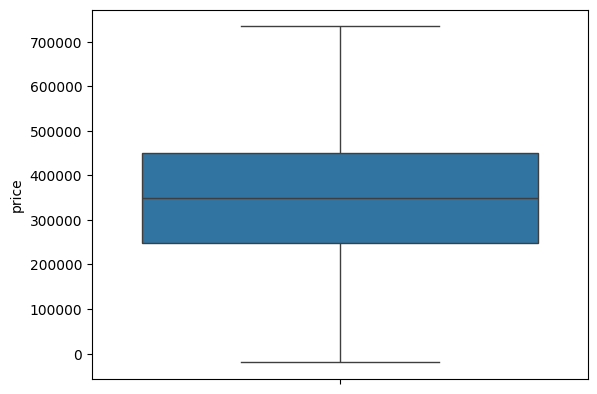

In [11]:
sns.boxplot(y="price",data=df)
plt.ylabel("price")

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df[["area"]]
y=df[["price"]]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=(0.33))

In [15]:
X_train

,area
703,3806
311,3932
722,1339
629,1084
0,1567
...,...
106,3927
270,4294
860,1648
435,2885


In [16]:
y_train

,price
703,476727.07
311,347280.20
722,218191.63
629,105736.29
0,177067.50
...,...
106,466788.89
270,425048.73
860,305524.80
435,352594.59


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler1 = StandardScaler()

In [18]:
X_trainscaled=scaler.fit_transform(np.array(X_train).reshape(-1,1))
X_testscaled=scaler.transform(np.array(X_test).reshape(-1,1))

In [19]:
y_trainscaled=scaler1.fit_transform(np.array(X_train).reshape(-1,1))
y_testscaled=scaler1.transform(np.array(X_test).reshape(-1,1))

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()
model.fit(X_trainscaled,y_trainscaled)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
model.predict(X_testscaled)

array([[ 7.10750190e-01],
       [-1.19907240e+00],
       [ 9.63637042e-01],
       [ 2.58482970e-02],
       [-7.68813514e-01],
       [ 5.61476700e-01],
       [-1.24303272e-01],
       [-5.52805994e-01],
       [-1.67235716e+00],
       [ 1.51155856e+00],
       [ 7.67768993e-02],
       [-1.61001353e+00],
       [ 1.75829885e+00],
       [-5.97588041e-01],
       [-9.24233559e-01],
       [-6.37157966e-02],
       [ 1.63800198e+00],
       [-1.40981144e+00],
       [-1.00413878e+00],
       [ 9.75930153e-01],
       [-5.49350031e-02],
       [ 1.13486252e+00],
       [ 8.83731821e-01],
       [-9.00581771e-02],
       [ 6.96700920e-01],
       [ 5.76404049e-01],
       [ 9.84710947e-01],
       [ 2.76044557e-02],
       [ 6.97522645e-02],
       [ 7.01091317e-01],
       [-3.16602649e-01],
       [ 8.38015341e-02],
       [ 5.85184843e-01],
       [ 1.56073100e+00],
       [ 1.36486295e-01],
       [ 4.41179829e-01],
       [-6.62565913e-01],
       [ 1.17168549e-01],
       [ 2.9

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [92]:
y_pred=model.predict(X_test)

C:\Users\Arcite\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [93]:
mean_squared_error(y_test,y_pred)

143849302964.9477

In [94]:
mean_absolute_error(y_test,y_pred)

349705.07106060605

In [95]:
r2_score(y_test,y_pred)

-5.55407099444126

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(np.array(X_train).reshape(-1,1),y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
y_pred_dt=dt_model.predict(X_test.values.reshape(-1,1))

In [31]:
y_pred_dt

array([330577.79 , 258454.22 , 527148.41 , 441413.79 , 226627.63 ,
       349259.39 , 355372.84 , 354509.   , 152430.725, 473185.6  ,
       501692.21 , 213203.1  , 619724.31 , 344956.15 , 275653.29 ,
       453697.06 , 488853.44 , 252230.99 , 118641.59 , 408346.61 ,
       398770.65 , 446381.95 , 622253.47 , 264050.13 , 567658.52 ,
       467292.26 , 408346.61 , 487226.97 , 354788.62 , 404726.03 ,
       296151.32 , 501692.21 , 468291.84 , 638759.97 , 449885.27 ,
       475247.99 , 306274.15 , 442666.19 , 425088.505, 479623.23 ,
       235523.21 , 172228.59 , 410406.4  , 467768.69 , 239874.18 ,
       520062.9  , 200391.71 , 535405.33 , 557068.1  , 391123.83 ,
       352284.47 , 260291.64 , 210068.49 , 432382.3  , 158543.92 ,
       408346.61 , 448889.61 , 437288.07 , 469396.74 ,  46915.73 ,
       271790.73 , 620146.6  , 226627.63 , 375956.47 , 383661.2  ,
       503695.94 ,  15436.18 , 577781.66 , 414414.77 , 550314.16 ,
       172228.59 , 462484.48 , 443502.28 , 623277.29 , 481871.

[Text(0.4868873659270988, 0.9814814814814815, 'x[0] <= 2851.0\nsquared_error = 19299164053.488\nsamples = 670\nvalue = 345979.639'),
 Text(0.2449080867739029, 0.9444444444444444, 'x[0] <= 1850.0\nsquared_error = 10190231183.568\nsamples = 327\nvalue = 249245.534'),
 Text(0.3658977263505009, 0.962962962962963, 'True  '),
 Text(0.08251363088297647, 0.9074074074074074, 'x[0] <= 1182.5\nsquared_error = 8340498403.728\nsamples = 139\nvalue = 199370.108'),
 Text(0.014548441806232775, 0.8703703703703703, 'x[0] <= 1036.5\nsquared_error = 6011345148.908\nsamples = 28\nvalue = 152901.246'),
 Text(0.0067839728641085435, 0.8333333333333334, 'x[0] <= 1013.5\nsquared_error = 2065001210.984\nsamples = 5\nvalue = 182289.964'),
 Text(0.0033919864320542717, 0.7962962962962963, 'x[0] <= 1007.5\nsquared_error = 76126323.002\nsamples = 2\nvalue = 149818.88'),
 Text(0.0016959932160271359, 0.7592592592592593, 'squared_error = 0.0\nsamples = 1\nvalue = 141093.84'),
 Text(0.005087979648081407, 0.75925925925925

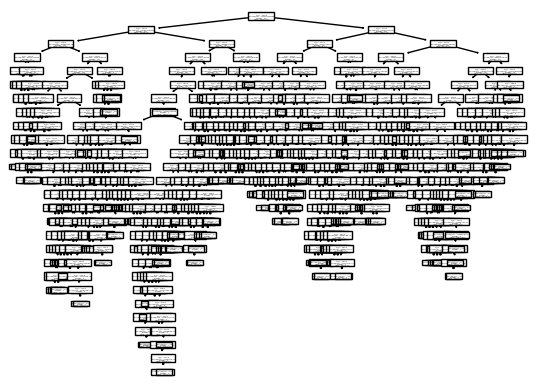

In [32]:
from sklearn import tree
tree.plot_tree(dt_model)


In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
mean_squared_error(y_test,y_pred_dt)

15549293677.637453

In [35]:
mean_absolute_error(y_test,y_pred_dt)

99881.25096969696

In [36]:
r2_score(y_test,y_pred_dt)

0.2915421029083082

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(np.array(X_train).reshape(-1,1), y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
y_pred_knn = knn.predict(X_test.values.reshape(-1,1))

In [40]:
y_pred_knn

array([[387313.74 ],
       [241221.4  ],
       [471017.13 ],
       [388832.71 ],
       [287960.388],
       [429165.112],
       [334681.51 ],
       [278668.828],
       [140722.798],
       [483212.316],
       [385752.896],
       [161921.434],
       [575525.284],
       [304663.146],
       [316068.04 ],
       [370065.43 ],
       [446066.806],
       [229592.844],
       [189720.328],
       [471017.13 ],
       [378762.24 ],
       [448672.672],
       [494374.158],
       [354902.502],
       [427663.652],
       [423846.186],
       [471017.13 ],
       [400205.178],
       [362591.88 ],
       [433694.492],
       [219817.856],
       [381679.166],
       [405735.874],
       [575141.43 ],
       [428529.5  ],
       [344297.95 ],
       [286713.11 ],
       [385461.684],
       [382998.904],
       [429147.438],
       [187013.648],
       [206277.868],
       [394404.176],
       [464828.414],
       [313308.094],
       [403541.224],
       [281502.5  ],
       [42352

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
mean_squared_error(y_test,y_pred_knn)

9387537879.126112

In [43]:
mean_absolute_error(y_test,y_pred_knn)

78517.24907272727

In [44]:
r2_score(y_test,y_pred_knn)

0.5722844083728963

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
forest= RandomForestRegressor(n_estimators=300,)
forest.fit(X_train,y_train)

C:\Users\Arcite\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
pred_forest = knn.predict(X_test.values.reshape(-1,1))

In [48]:
pred_forest

array([[387313.74 ],
       [241221.4  ],
       [471017.13 ],
       [388832.71 ],
       [287960.388],
       [429165.112],
       [334681.51 ],
       [278668.828],
       [140722.798],
       [483212.316],
       [385752.896],
       [161921.434],
       [575525.284],
       [304663.146],
       [316068.04 ],
       [370065.43 ],
       [446066.806],
       [229592.844],
       [189720.328],
       [471017.13 ],
       [378762.24 ],
       [448672.672],
       [494374.158],
       [354902.502],
       [427663.652],
       [423846.186],
       [471017.13 ],
       [400205.178],
       [362591.88 ],
       [433694.492],
       [219817.856],
       [381679.166],
       [405735.874],
       [575141.43 ],
       [428529.5  ],
       [344297.95 ],
       [286713.11 ],
       [385461.684],
       [382998.904],
       [429147.438],
       [187013.648],
       [206277.868],
       [394404.176],
       [464828.414],
       [313308.094],
       [403541.224],
       [281502.5  ],
       [42352

In [49]:
mean_squared_error(y_test,pred_forest)

9387537879.126112

In [50]:
mean_absolute_error(y_test,pred_forest)

78517.24907272727

In [51]:
r2_score(y_test,pred_forest)

0.5722844083728963

In [53]:
import pandas as pd

In [54]:
df=pd.DataFrame(s)

In [55]:
df

,Model,R2 SCORE
0,LOGISTIC,-5.5540
1,DECISION TREE,0.2915
2,KNN,0.9800
3,RANDOM FOREST,0.9800


In [59]:
from sklearn.svm import SVR

In [60]:
sv=SVR()

In [61]:
sv.fit(X_testscaled,y_testscaled)

C:\Users\Arcite\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [62]:
y_pred=sv.predict(X_testscaled)

In [63]:
y_pred

array([ 0.62030887, -1.26388511,  0.9339558 ,  0.02898998, -0.70379646,
        0.46180088, -0.07980936, -0.45464694, -1.60071721,  1.58725607,
        0.06539757, -1.59177998,  1.69007249, -0.50273739, -0.90510166,
       -0.03536924,  1.66312983, -1.48268668, -1.01187396,  0.95026904,
       -0.02900683,  1.16348949,  0.8297663 , -0.05456392,  0.60447364,
        0.47668889,  0.9619568 ,  0.03024482,  0.06036898,  0.60940185,
       -0.23150218,  0.07043044,  0.48554488,  1.62213913,  0.10838951,
        0.34915877, -0.57592497,  0.0944182 ,  0.23056495,  1.67356249,
       -0.25863979, -1.08902865,  0.18242381,  1.10937029, -0.34735274,
        0.80739486, -0.96840305,  1.01602073,  0.70121037,  0.75463467,
       -0.35743402, -1.30155448, -1.52945941,  0.00637835, -1.59963629,
        0.95844756,  1.42739134,  1.560765  ,  0.10711629, -1.56646696,
       -0.55875952,  1.26955589, -0.7005135 ,  0.84668261, -0.16598473,
        0.6761645 , -1.56095882,  1.50559751, -0.42725944,  0.64

In [64]:
mean_squared_error(X_testscaled,y_pred)

0.00447518278994745

In [65]:
mean_absolute_error(X_testscaled,y_pred)

0.059449275479901545

In [66]:
r2_score(X_testscaled,y_pred)

0.9952457186148745

In [83]:
s={"Model":["LOGISTIC","DECISION TREE","KNN","RANDOM FOREST","SVR"],
"MEAN SQUARED ERROR":[2.85,0.62,0.015,0.012,0.00447]}

In [84]:
import pandas as pd

In [85]:
df=pd.DataFrame(s)

In [86]:
df

,Model,MEAN SQUARED ERROR
0,LOGISTIC,2.85000
1,DECISION TREE,0.62000
2,KNN,0.01500
3,RANDOM FOREST,0.01200
4,SVR,0.00447


<Axes: xlabel='Model', ylabel='MEAN SQUARED ERROR'>

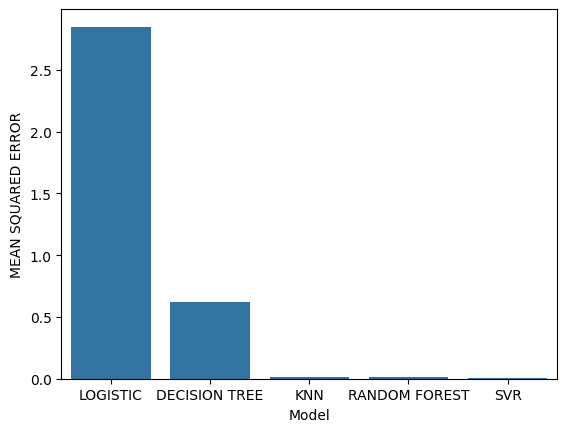

In [90]:
sns.barplot(data=df,x="Model",y="MEAN SQUARED ERROR")

From this Bar Plot we can understand that,SVR achieves the lowest error,indicating the best model performance,followed by Random Forest and KNN.
Decision tree shows moderate error,while Logistic has the Highest Error,making it the least suitable model for this dataset